# Import Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [34]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

In [36]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## categorical features
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

## numerical features
Continous: Age, Fare. Discrete: SibSp, Parch.

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Mixed Data Type
Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

In [38]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## blank, null or empty values
Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.

## features
Seven features are integer or floats. Six in case of test dataset.
Five features are strings (object).

In [39]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

## distribution of numerical feature values
<li>Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).</li>
<li>Survived is a categorical feature with 0 or 1 values.</li>
<li>Around 38% samples survived representative of the actual survival rate at 32%.</li>
<li>Most passengers (> 75%) did not travel with parents or children.</li>
<li>Nearly 30% of the passengers had siblings and/or spouse aboard.</li>
<li>Fares varied significantly with few passengers (< 1%) paying as high as $512.</li>
<li>Few elderly passengers (< 1%) within age range 65-80.</li>

In [40]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## distribution of categorical features

<li>Names are unique across the dataset (count=unique=891)</li>
<li>Sex variable as two possible values with 65% male (top=male, freq=577/count=891).</li>
<li>Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.</li>
<li>Embarked takes three possible values. S port used by most passengers (top=S)</li>
<li>Ticket feature has high ratio (22%) of duplicate values (unique=681).</li>

In [41]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Analyze by pivoting features

<li>Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.</li>
<li>Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).</li>
<li>SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).</li>

In [42]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [43]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [44]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [45]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Analyze by visualizing data
## Correlating numerical features
### Observations.
<li>Infants (Age <=4) had high survival rate.</li>
<li>Oldest passengers (Age = 80) survived.</li>
<li>Large number of 15-25 year olds did not survive.</li>
<li>Most passengers are in 15-35 age range.</li>

### Decisions.
This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

<li>We should consider Age (our assumption classifying #2) in our model training.</li>
<li>Complete the Age feature for null values (completing #1).</li>
<li>We should band age groups (creating #3).</li>

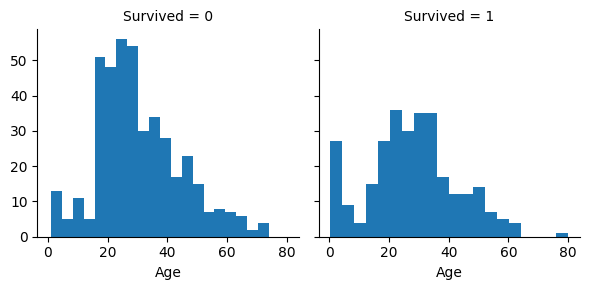

In [46]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Correlating numerical and ordinal features
### Observations.
<li>Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.</li>
<li>Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.</li>
<li>Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.</li>
<li>Pclass varies in terms of Age distribution of passengers.</li>

### Decisions.
<li>Consider Pclass for model training.</li>

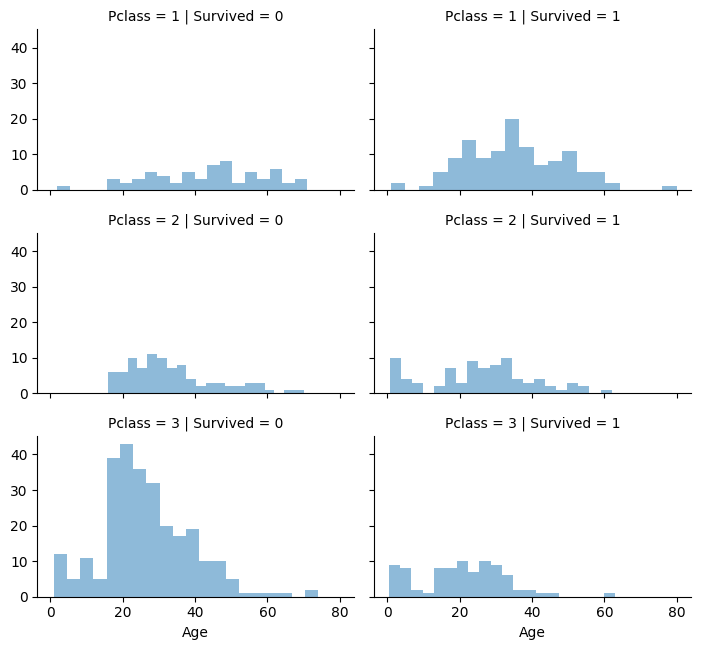

In [47]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


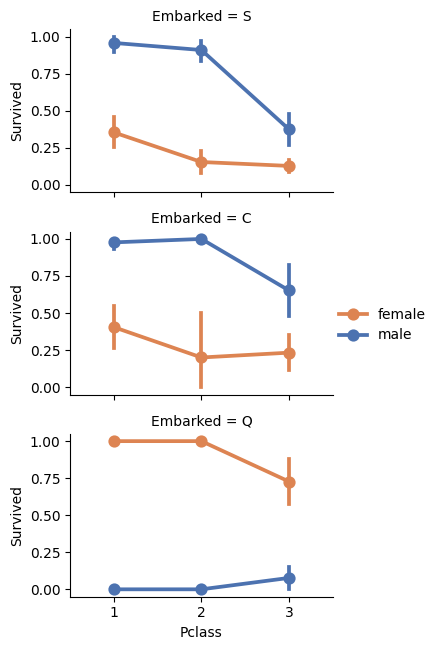

In [48]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\

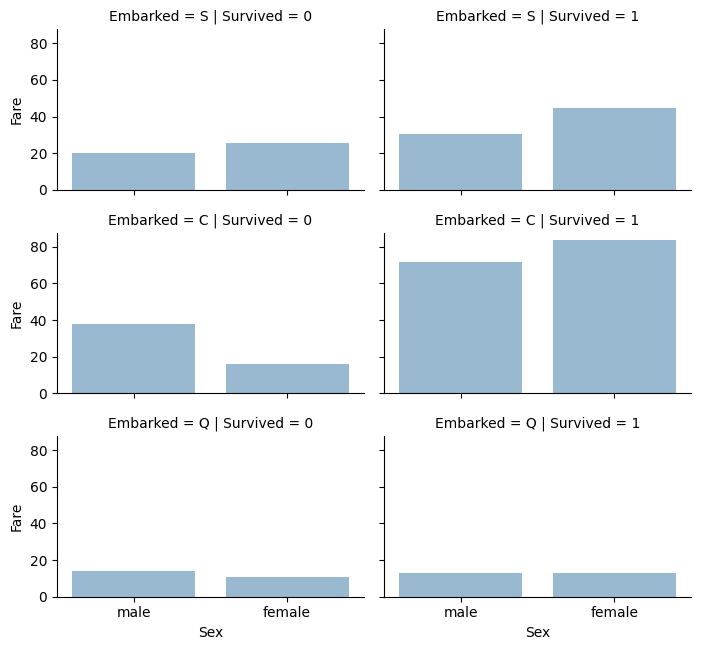

In [49]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Wrangle data

## Correcting by dropping features

In [50]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

## Creating new feature extracting from existing

In [51]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [52]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [53]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [54]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

## Converting a categorical feature

In [55]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## Completing a numerical continuous feature

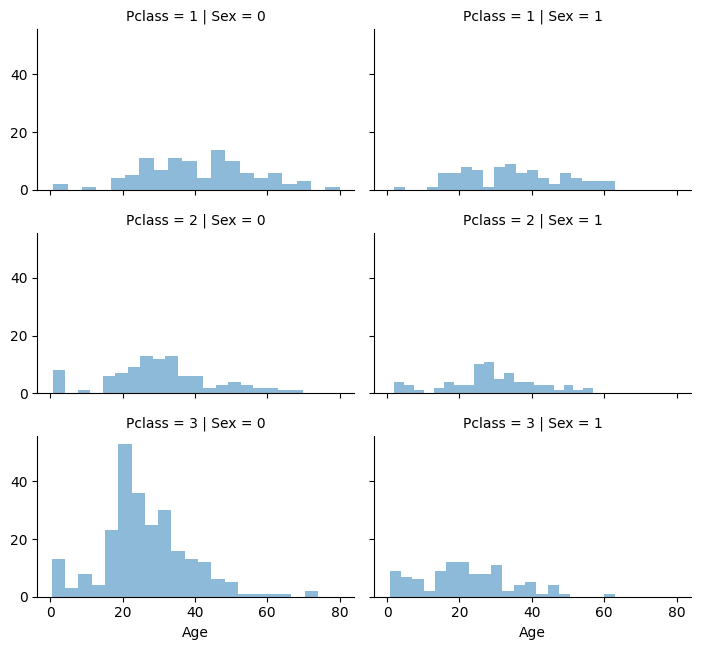

In [56]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [57]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [58]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [59]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\shahy_mxyzd8u\AppData\Local\Temp\ipykernel_39868\987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [60]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [61]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [62]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [63]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [64]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [65]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## Completing a categorical feature

In [66]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [67]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Converting categorical feature to numeric

In [68]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## Quick completing and converting a numeric feature

In [69]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

C:\Users\shahy_mxyzd8u\AppData\Local\Temp\ipykernel_39868\31889810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [70]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\shahy_mxyzd8u\AppData\Local\Temp\ipykernel_39868\2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [71]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [72]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [73]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# 1. Fine-tune a decision tree model

# Model, predict and solve

In [74]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

82.49

In [75]:
print("Survived: ",len(Y_train[Y_train == 1]))
print("Not Survived: ",len(Y_train[Y_train == 0]))

Survived:  342
Not Survived:  549


In [76]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify number of folds for KFolds CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': [2,5,10,20,40,60,80,100]}

# instantiate the model
dtree = DecisionTreeClassifier(criterion='gini',
                              random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                   cv = n_folds,
                   scoring = 'accuracy')

tree.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': [2, 5, 10, 20, 40, 60, 80, 100]},
             scoring='accuracy')

In [77]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006196,0.000401,0.003800,0.001599,2,{'min_samples_leaf': 2},0.776536,0.780899,0.820225,0.814607,0.825843,0.803622,0.020688,1
1,0.006798,0.002855,0.003202,0.001167,5,{'min_samples_leaf': 5},0.787709,0.758427,0.803371,0.803371,0.814607,0.793497,0.019514,4
2,0.007895,0.005629,0.003266,0.002864,10,{'min_samples_leaf': 10},0.787709,0.775281,0.814607,0.775281,0.825843,0.795744,0.020803,3
3,0.006784,0.002349,0.003427,0.000815,20,{'min_samples_leaf': 20},0.787709,0.769663,0.803371,0.775281,0.814607,0.790126,0.016850,5
4,0.003820,0.001239,0.002273,0.001153,40,{'min_samples_leaf': 40},0.810056,0.780899,0.797753,0.786517,0.814607,0.797966,0.013004,2
5,0.002998,0.000445,0.002137,0.000875,60,{'min_samples_leaf': 60},0.748603,0.780899,0.797753,0.752809,0.831461,0.782305,0.030538,6
6,0.003636,0.000718,0.002334,0.000347,80,{'min_samples_leaf': 80},0.748603,0.786517,0.814607,0.752809,0.797753,0.780058,0.025614,7
7,0.003114,0.000234,0.002006,0.000627,100,{'min_samples_leaf': 100},0.748603,0.786517,0.814607,0.752809,0.797753,0.780058,0.025614,7


In [78]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy: ", tree.best_score_)
print(tree.best_estimator_)

best accuracy:  0.8036218693114054
DecisionTreeClassifier(min_samples_leaf=2, random_state=100)


# Now apply the five-fold cross validation on fine-tuned decision tree learning model

In [79]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify number of folds for KFolds CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 15)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion='gini',
                              random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                   cv = n_folds,
                   scoring = 'accuracy')
tree.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 15)}, scoring='accuracy')

In [80]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006193,0.002323,0.003214,0.000394,1,{'max_depth': 1},0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,14
1,0.004010,0.002114,0.002190,0.000405,2,{'max_depth': 2},0.748603,0.786517,0.814607,0.752809,0.797753,0.780058,0.025614,13
2,0.003195,0.000400,0.002410,0.001040,3,{'max_depth': 3},0.832402,0.803371,0.803371,0.797753,0.831461,0.813671,0.015053,1
3,0.002392,0.000484,0.002003,0.000637,4,{'max_depth': 4},0.821229,0.792135,0.803371,0.775281,0.825843,0.803572,0.018649,5
4,0.003001,0.000632,0.002004,0.000631,5,{'max_depth': 5},0.770950,0.769663,0.803371,0.775281,0.837079,0.791269,0.026001,12
5,0.004212,0.001181,0.002593,0.001191,6,{'max_depth': 6},0.770950,0.775281,0.831461,0.797753,0.820225,0.799134,0.023896,8
6,0.003400,0.001840,0.002800,0.002118,7,{'max_depth': 7},0.787709,0.764045,0.825843,0.814607,0.842697,0.806980,0.027944,2
7,0.003993,0.001264,0.001408,0.000490,8,{'max_depth': 8},0.787709,0.769663,0.814607,0.820225,0.831461,0.804733,0.022678,3
8,0.003198,0.000981,0.001399,0.000490,9,{'max_depth': 9},0.782123,0.780899,0.808989,0.814607,0.831461,0.803616,0.019509,4
9,0.003802,0.000748,0.001795,0.000398,10,{'max_depth': 10},0.770950,0.775281,0.808989,0.814607,0.831461,0.800257,0.023403,6


In [81]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy: ", tree.best_score_)
print(tree.best_estimator_)

best accuracy:  0.8136714581633294
DecisionTreeClassifier(max_depth=3, random_state=100)


max_depth = 3 is the optimal value for getting the highest accuracy here.
<br>Now we will use gini and entropy to check the combined optimal parameters of min leafs and depth.

In [87]:
# Create the parameter grid
param_grid = {"max_depth": range(1, 15, 1),
              'min_samples_leaf': [2,5,10,20,40],
              "min_samples_split": [2,5,10,20,40],
              "criterion": ['gini','entropy']}

k_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree,
                          param_grid = param_grid,
                          cv = k_folds,
                          verbose = 1)

# Fit the grid Search to the data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': [2, 5, 10, 20, 40],
                         'min_samples_split': [2, 5, 10, 20, 40]},
             verbose=1)

In [88]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003811,0.000756,0.002192,0.000750,gini,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
1,0.002199,0.000400,0.001803,0.000402,gini,1,2,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
2,0.002799,0.000756,0.001196,0.000403,gini,1,2,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
3,0.003596,0.000488,0.001619,0.000817,gini,1,2,20,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
4,0.003581,0.000812,0.002601,0.000801,gini,1,2,40,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
5,0.002802,0.001165,0.001801,0.000400,gini,1,5,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
6,0.003395,0.000501,0.002401,0.000499,gini,1,5,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
7,0.004603,0.001374,0.002660,0.000413,gini,1,5,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
8,0.003398,0.001029,0.003005,0.001413,gini,1,5,20,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676
9,0.002997,0.000632,0.001599,0.000490,gini,1,5,40,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782123,0.786517,0.786517,0.752809,0.786517,0.778896,0.013154,676


In [89]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy: ", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy:  0.8136714581633294
DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)


In [90]:
cv_results['mean_test_score'].mean()

0.7946118618685942

The Decision Tree plotted will be:

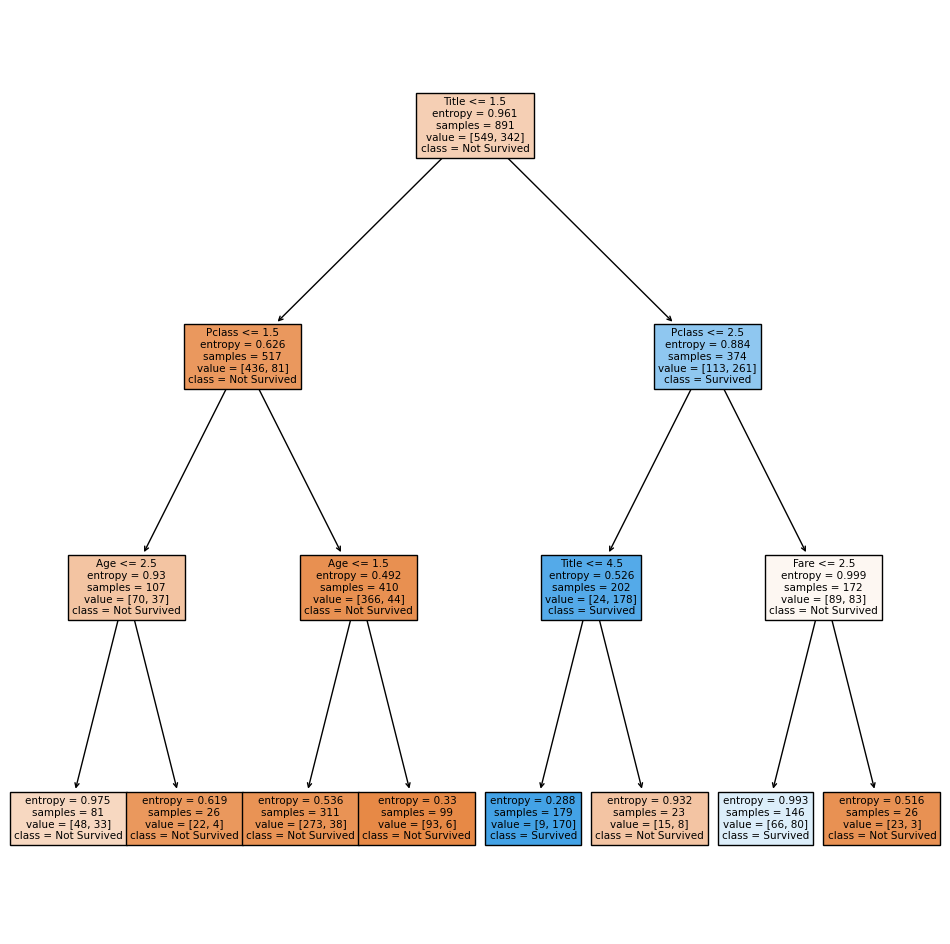

In [91]:
best_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,min_samples_split=40)
best_decision_tree.fit(X_train, Y_train)

import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(12, 12))
tree.plot_tree(best_decision_tree, filled=True, feature_names=X_train.columns, class_names=['Not Survived','Survived'])
plt.show()

# 2. Random Forest

# Model evaluation

In [92]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

we first need to create a parameter grid to sample from during fitting to use RandomizedSearchCV

In [93]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(random_forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Now we will use RandomizedSearchCV to get a ball-park figure of parameters which work the best

In [94]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50, 100, 200, 400, 500, 800, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,2,4,10,20,40]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20, 40]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 2, 4, 10, 20, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20, 40],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [50, 100, 200, 400, 500, 800, 1000]}


In [95]:
#create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
105 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
73 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\shahy_mxyzd8u\AppData\Local\Programs\Python\Python311

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 4, 10, 20, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             40],
                                        'min_samples_split': [2, 5, 10, 20, 40],
                                        'n_estimators': [50, 100, 200, 400, 500,
                                                         800, 1000]},
                   random_state=42, verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [97]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy: ", rf_random.best_score_)
print(rf_random.best_estimator_)

best accuracy:  0.8114430983616849
RandomForestClassifier(max_depth=40, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=1000)


Grid Seacrh based upon the neighborhood of values derived from RandomSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 19, 20, 21],
    # 'max_features': [1,2,3,4,5,6,7,8,9], # auto
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [4, 5, 6, 7],
    'n_estimators': [150, 200, 250]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 19, 20, 21],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [150, 200, 250]},
             verbose=2)

In [99]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.518600,0.085455,0.022400,0.005887,True,10,1,4,150,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.793296,0.786517,0.859551,0.797753,0.853933,0.818210,0.031714,8
1,0.654016,0.064074,0.030374,0.004967,True,10,1,4,200,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.793296,0.786517,0.797753,0.808989,0.859551,0.809221,0.026206,121
2,0.929587,0.094275,0.041826,0.010069,True,10,1,4,250,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.793296,0.786517,0.803371,0.808989,0.865169,0.811468,0.027958,81
3,0.575663,0.058318,0.034364,0.009401,True,10,1,5,150,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.798883,0.786517,0.797753,0.792135,0.859551,0.806968,0.026659,157
4,0.667861,0.074477,0.028672,0.008798,True,10,1,5,200,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.793296,0.786517,0.814607,0.797753,0.870787,0.812592,0.030539,68
5,0.938221,0.178387,0.039469,0.012769,True,10,1,5,250,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.793296,0.792135,0.842697,0.797753,0.865169,0.818210,0.030079,8
6,0.583369,0.139112,0.023798,0.004443,True,10,1,6,150,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.798883,0.792135,0.853933,0.792135,0.870787,0.821574,0.033815,2
7,0.712441,0.084485,0.038254,0.022020,True,10,1,6,200,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.798883,0.786517,0.837079,0.780899,0.859551,0.812586,0.030584,70
8,0.913375,0.138889,0.041389,0.011804,True,10,1,6,250,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.798883,0.780899,0.842697,0.786517,0.859551,0.813709,0.031551,46
9,0.490423,0.043033,0.024540,0.007846,True,10,1,7,150,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.798883,0.786517,0.831461,0.792135,0.859551,0.813709,0.027717,46


In [100]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy: ", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy:  0.8215805661917018
RandomForestClassifier(max_depth=19, min_samples_split=7, n_estimators=200)


In [101]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 200}

max_depth = 19, min_samples_leaf = 1, min_samples_split = 7 are the optimal valeus for getting the highest accuracy here of 82.15%.

This is average accuracy which is better than the average accuracy obtained from that of the decision tree. From the comparison of the fine-tuned (fine-tuned to prevent problems like overfitting) model accuracies we can assert that Random-Forest algorithm is better than Decision-Tree.

In [102]:
cv_results['mean_test_score'].mean()

0.8113750270262731

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.